# Assignment — Introduction to Network Science

In this assignment, we will consider some basics of networkx 2.5.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from zlib import adler32
import pandas as pd

In [2]:
assert nx.__version__ == '2.5'

In case of an exception, install networkx 2.5 using `pip` as follows:
```
pip uninstall networkx
pip install networkx==2.5
```

### Task 1. Reading a graph from a file (0.5 point)

In [3]:
url = 'https://raw.githubusercontent.com/netspractice/ml-on-graphs/main/datasets/the_lord_of_the_rings_adjlist.txt'
open('the_lord_of_the_rings_adjlist.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/ml-on-graphs/main/datasets/the_lord_of_the_rings_edgelist.txt'
open('the_lord_of_the_rings_edgelist.txt', 'wb').write(requests.get(url).content);


Usually graph is a sparse data structure. So in most cases data is stored in sparse table formats
1. edge list
2. adjacency list

Edge list is a list of pairs of nodes — a target and destination of edges.

In [4]:
with open('the_lord_of_the_rings_edgelist.txt') as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND



Adjacency list is a list of lists of nodes where the first node is a root and others are leafs

In [5]:
with open('the_lord_of_the_rings_adjlist.txt') as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



Most of other specific formats are similar except of syntax and metadata description.

For most cases we can use given functions in networkx:

* `nx.read_adjlist`
* `nx.read_edgelist`
* `nx.read_weighted_edgelist`

In the further task, read two files: `the_lord_of_the_rings_edgelist.txt`, `the_lord_of_the_rings_adjlist.txt` and merge it in a single graph.

In [6]:
def read_and_merge_graphs(edgelist_path, adjlist_path):
    g1 = nx.read_edgelist(edgelist_path, delimiter=', ')
    g2 = nx.read_adjlist(adjlist_path, delimiter=', ')
    g1.add_edges_from(g2.edges)
    return g1

In [7]:
G = read_and_merge_graphs("the_lord_of_the_rings_edgelist.txt", 
                          "the_lord_of_the_rings_adjlist.txt")

assert nx.number_of_nodes(G) == 35
assert nx.number_of_edges(G) == 98

### Task 2. Directed graph (1 point)

The direction in graphs could be crucial feature for many tasks, e.g., link analysis.

We can handle directed graphs with `nx.DiGraph` class. We can use conversion method `nx.to_directed` on the given graph or read it directly passing `nx.DiGraph` constructor to the `nx.read_*` methods.

In [8]:
def convert_to_directed_graph(G):
    G.to_directed()
    return G

In [9]:
def read_directed_graph(path1):
    G = nx.read_edgelist(path1, delimiter=', ', create_using=nx.DiGraph)
    return G

In [10]:
G = read_directed_graph("the_lord_of_the_rings_edgelist.txt")


In [11]:
assert convert_to_directed_graph(G).is_directed()
G = read_directed_graph("the_lord_of_the_rings_edgelist.txt")
assert G.is_directed()

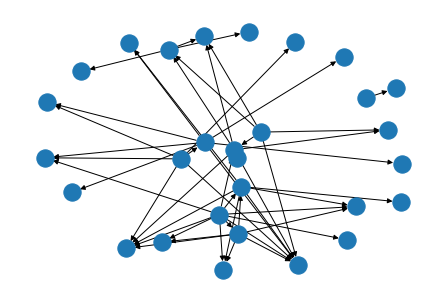

In [12]:
nx.draw(G)

### Task 3. Bacis statistics (0.5 point)

Networkx provides a simple interface for getting basic graph statistics:
* `nx.radius`
* `nx.diameter`
* `nx.average_shortest_path_length`
* `nx.average_clustering`

For example, here are statistics of a path graph with 3 nodes:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


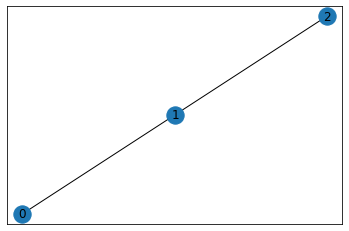

In [13]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Your task is to create graphs by given statistics.

Write a function `graph1` that returns a graph with a radius 3 and diameter 3.

In [14]:
def graph1():
    G = nx.cycle_graph(6)
    return G

In [15]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3

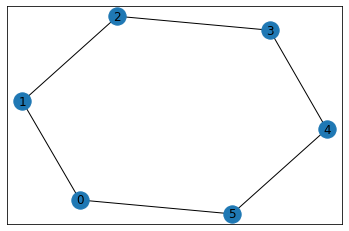

In [16]:
nx.draw_networkx(G)

Write a function `graph2` that returns a graph with a diameter of at least 5 average shortest path lengths.

In [17]:
def graph2():
    n = 100
    m = 10
    G = nx.complete_graph(n)
    for i in range(m):
        G.add_edge(n - 1 + i, n + i)
    return G

In [18]:
G = graph2()
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)

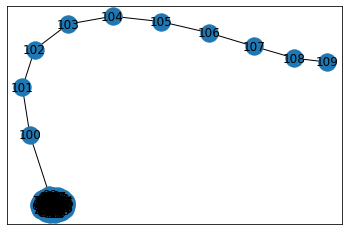

In [19]:
nx.draw_networkx(G)

Write a function `graph3` that returns a graph with an average clustering coefficient between 0.1 and 0.11.

In [20]:
def graph3():
    G = nx.cycle_graph(16)
    G.add_edge(1, 3)
    return G

In [21]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11

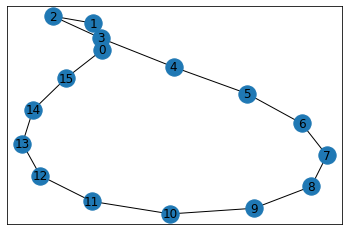

In [22]:
nx.draw_networkx(G)

### Task 4. Graph layout (2 points)

A graph layout is a dictionary with a location of every node: keys are nodes and values are x, y positions. By default in `nx.draw_networkx`, it is the spring layout — a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects.

In [23]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([-0.28786408,  0.52137881]),
 1: array([ 0.86334751, -0.20216957]),
 2: array([-0.05919235, -0.00995446]),
 3: array([-0.48539333, -0.17083953]),
 4: array([ 0.31232364, -0.36018167]),
 5: array([ 0.43245045, -0.86826001]),
 6: array([-0.2140241 , -0.84924359]),
 7: array([0.50481178, 0.49216727]),
 8: array([-0.88973226,  0.44710275]),
 9: array([-0.17672726,  1.        ])}

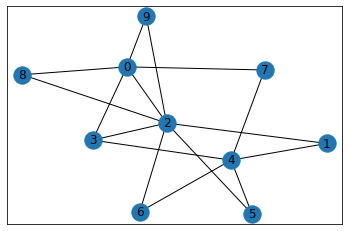

In [24]:
nx.draw_networkx(G, pos=layout)

The Kamada Kawai layout is based on path-length cost-function. Sometimes, it is quite similar to the spring layout, however a significant difference is that the spring layout is random and the Kamada Kawai is deterministic.

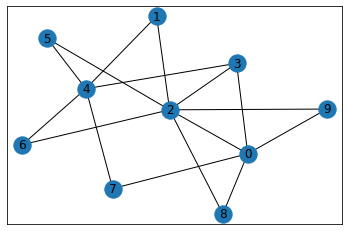

In [25]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)

Circular layout allows to draw a graph where nodes are in a circle.

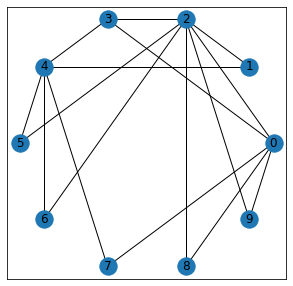

In [26]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Bipartite layout allows to draw bipartite graph.

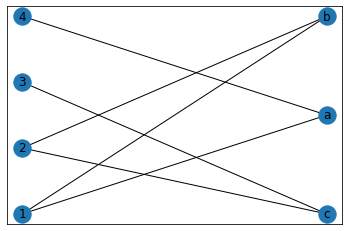

In [27]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

There are other layouts in networkx, also there are some useful parameters that you can find in documentation. Next, let us visualize a coappearance network of characters in The Matrix — a 1999 American science fiction action film written and directed by the Wachowskis. The dataset is taken from https://moviegalaxies.com/.

In [28]:
url = 'https://raw.githubusercontent.com/netspractice/ml-on-graphs/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);


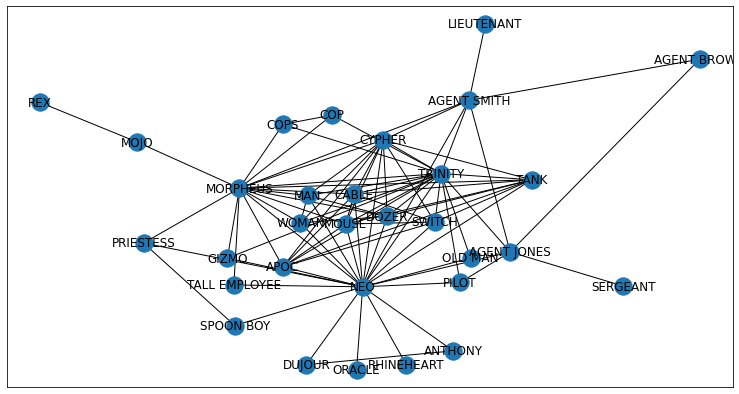

In [29]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)

Your task is to draw the matrix graph using the kamada kawai layout with nonlinear modification to obtain a denser layout away from the NEO node. Let us define a proximity coefficient using Gaussian kernel

$$\text{coef}(i) = \exp\left(-\frac{\text{distance}^2}{2\sigma^2}\right)$$

where a _distance_ is the Euclidean distance from the node $i$ to the NEO node, $\sigma$ is the constant. Then the nodes should be moved towards the NEO node such that

$$\text{distance} = \text{coef}(i) \times \text{distance}$$

The simplest way to do it is to center the layout so that the NEO node is in x=0 y=0 and then to multiply all node positions by the proximity coefficient.

Write a function `dense_neo_layout` that takes a layout, sigma and returns a new (dense) layout.

_Hint: use `np.linalg.norm` to calculate Euclidean norm._

In [30]:
def dense_neo_layout(layout, sigma):
    neo = layout['NEO'].copy()
    for key in layout:
        layout[key] -= neo
        layout[key] *= np.exp(-np.linalg.norm(layout[key])**2 / 2 / sigma**2)
    return layout

In [31]:
layout = nx.kamada_kawai_layout(matrixG)
layout = dense_neo_layout(layout, sigma=1.5)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

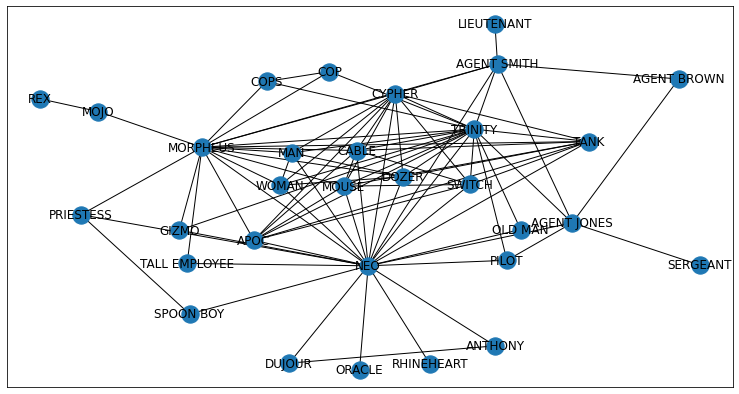

In [32]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

### Task 5. Nodes visualization (0.5 point)

We can set a node size using `draw_networkx` with a parameter `node_size`. It should be a list of values ordered by `G.nodes`. For example, consider a simple path graph.

In [33]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))

Let us set a size 200 for the node 0, 300 for 1, 400 for 2.

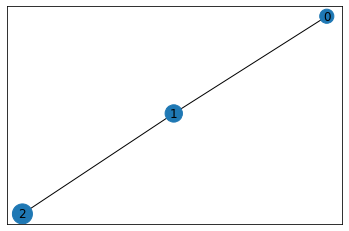

In [34]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

To color nodes, we can use `node_color`. It should be a list of colors:
* a tuple of float RGB 0-1 values: (red, green, blue)
* a tuple of float RGBA 0-1 values: (red, green, blue, alpha)
* a string — color name

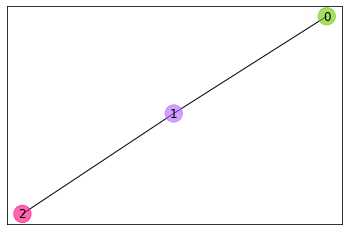

In [35]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

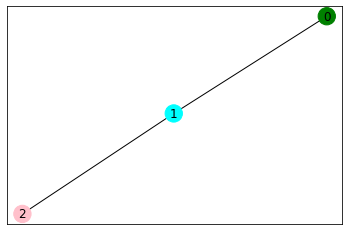

In [36]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Also we can use a colors from matplotlib colormaps. Discrete:

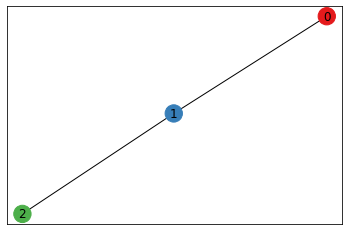

In [37]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Or continuous:

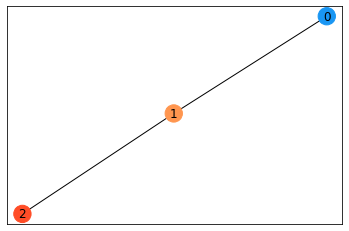

In [38]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Another option of coloring nodes is to pass a list of single values by the `node_color` and colormap by the `cmap` parameter. In this case, the lowest value will assigned to the first color in colormap and vise versa.

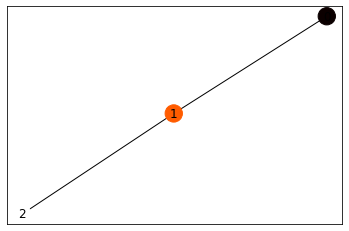

In [39]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])

We can forcibly set a color range using `vmin` and `vmax`.

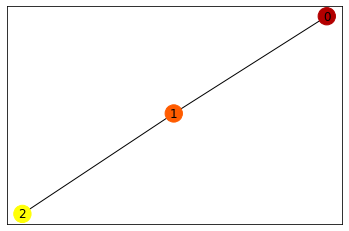

In [40]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

We can border nodes using `edgecolors` and `linewidths` parameters.

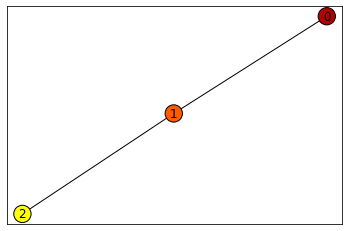

In [41]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Your task is to adjust a size and color of nodes in the matrix graph, size and color are taken from a node degree and node attribute `G.nodes[node]`.

In [42]:
matrixG.nodes['NEO']

{'movie_id': 543,
 'Eccentricity': 3.0,
 'Closeness Centrality': 1.2666666666666666,
 'Betweenness Centrality': 197.97857142857137,
 'Degree': 23,
 'Component ID': 0,
 'Modularity Class': 2,
 'viz': {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1.0},
  'size': 20.0,
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0}},
 'label': 'NEO'}

Write a function `drawing_nodes_params` that takes a graph and returns a dictionary with parameters for `nx.draw_networkx` of the form `{'G': graph, 'node_color': color, ...}`. Parameters should contain a graph, kamada kawai layout, node colors from `viz.color` attribute. The colors should be converted from RGB range 0-255 to RGB range 0-1. The node size is a node degree `G.degree[node]` multiplied by 100.

In [43]:
def drawing_nodes_params(graph):
    res = {
        'G': graph, 
        'pos': nx.kamada_kawai_layout(graph),
        'node_color': np.array([
            [graph.nodes[node_name]['viz']['color'][c] / 255 for c in 'rgb'] 
            for node_name in graph.nodes]),
        'node_size': 100 * np.array(
            [graph.nodes[node_name]['Degree'] for node_name in graph.nodes]),
    }
    return res

In [44]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

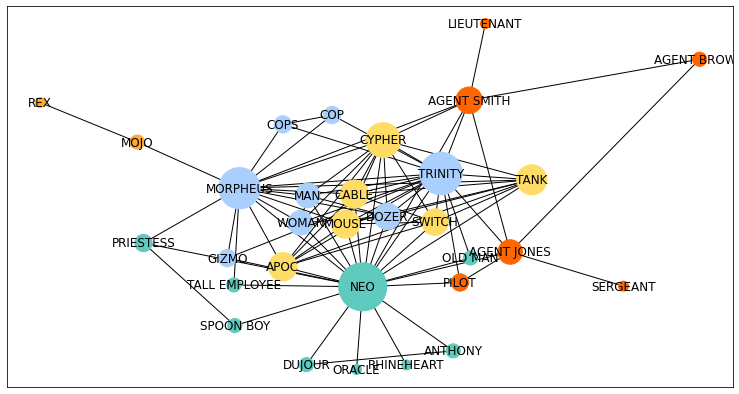

In [45]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Sometimes, it will be useful to draw nodes in nonlinear scale. If we want to make node sizes more comparable, we can use polynomial or exponential scale. On the other hand, we can use logarithmic scale to make sizes more similar.

Write a function `drawing_nodes_polyparams` that returns the same dictionary as the `drawing_nodes_params` function, but the node size is a sum of node degree in a power 3 and 10.

$$\text{size} = \text{degree}^3 + 10$$

In [46]:
def drawing_nodes_polyparams(graph):
    res = {
        'G': graph, 
        'pos': nx.kamada_kawai_layout(graph),
        'node_color': np.array([
            [graph.nodes[node_name]['viz']['color'][c] / 255 for c in 'rgb'] 
            for node_name in graph.nodes]),
        'node_size': 10 + np.array(
            [graph.nodes[node_name]['Degree']**3 for node_name in graph.nodes]),
    }
    return res

In [47]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

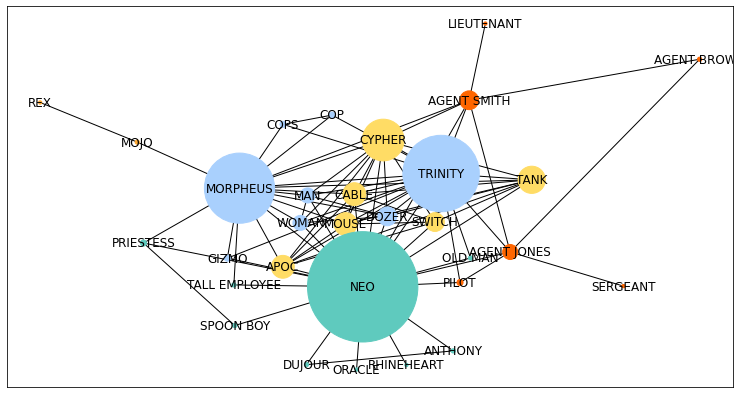

In [48]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

### Task 6. Edges visualization, weighted graphs (1 points)

We can set an edge width using `draw_networkx` with a parameter `width`. It should be a list of values sorted by G.edges. For example, consider a simple path graph.

In [49]:
G = nx.path_graph(4)
G.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

Let us set a width 1 for the edge 0-1, 5 for 1-2, 10 for 2-3.

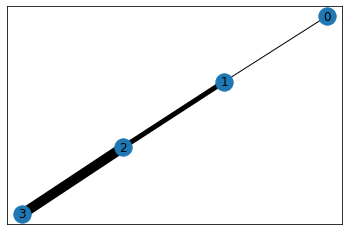

In [50]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, width=[1, 5, 10])

If we create a graph by a weighted ajacency matrix, weights will be stored in an edge attribute `weight`.

In [51]:
W = np.array([[0, 1, 0, 0], 
              [1, 0, 5, 0], 
              [0, 5, 0, 10], 
              [0, 0, 10, 0]])
G = nx.from_numpy_array(W)

In this case, we can get a value using `G.edges[edge]` view

In [52]:
G.edges[(0, 1)]

{'weight': 1}

Or we can get all values using `nx.get_edge_attributes`

In [53]:
nx.get_edge_attributes(G, 'weight')

{(0, 1): 1, (1, 2): 5, (2, 3): 10}

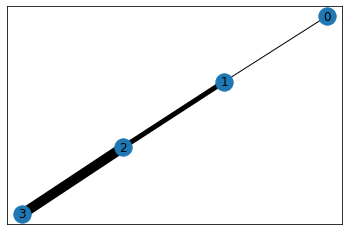

In [54]:
weights = list(nx.get_edge_attributes(G, 'weight').values())
nx.draw_networkx(G, pos=layout, width=weights)

If we want to apply specific color or style to some edges, it is possible by `edge_color` and `style` parameters. For example, we can draw an edge with a weight 10 as a red dotted line.

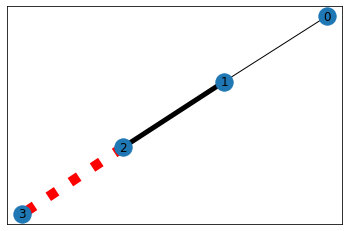

In [55]:
nx.draw_networkx(
    G, pos=layout, 
    width=[1, 5, 10], 
    edge_color=['black', 'black', 'red'], 
    style=['solid', 'solid', 'dotted'])

Your task is to draw the matrix graph where an edge width is 0 if a weight is 1, otherwise it is a weight value itself. An edge color is `red` if weight is at least 5 and `black` otherwise.

In [84]:
def drawing_edges_params(graph):
    def fix_zero(x):
        if x == 1:
            return 0
        return x
    
    def choose_color(x):
        if x >= 5:
            return 'red'
        return 'black'
        
    res = {
        'G': graph, 
        'pos': nx.kamada_kawai_layout(graph),
        'edge_color': [choose_color(graph.edges[edge]['weight']) for edge in graph.edges],
        'width': np.array([fix_zero(graph.edges[edge]['weight']) for edge in graph.edges])
    }
    return res

In [87]:
matrixG = get_matrix_graph()
params = drawing_edges_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'edge_color', 'width']
assert len(set(params.keys()).intersection(keys)) == 4
assert nx.to_numpy_array(params['G']).sum() == 326.0
params['width'][0] == 2.0
assert np.array(params['width']) @ params['width'] == 508
assert adler32(str(params['edge_color']).encode()) == 646700613

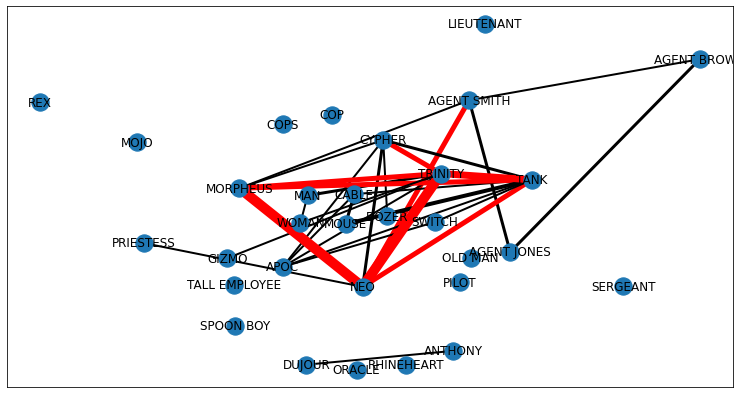

In [88]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params)

### Task 7. Power law CDF (0.5 point)

The PDF of the Power law distribution is 

$$ p(x) = Cx^{-\alpha},$$ 

where $C$ is a normalization constant 

$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$ 

and $\alpha>1$ is called an exponent of the distribution. 

In [89]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

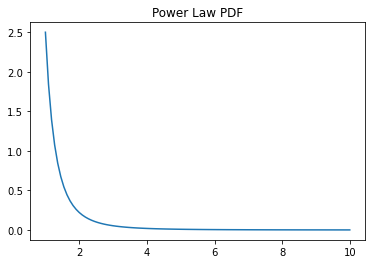

In [90]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Let us generate observations from a Power Law RV.

The first step is to derive CDF of Powel law: $F(x) = P(X \leq x)$

$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$

Take the integral, derive CDF analytically and write a function `power_law_cdf` with parameters `x`, `alpha` and `x_min`.

In [91]:
def power_law_cdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return 1 - C / (alpha - 1) * x ** (1 - alpha) 

In [92]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

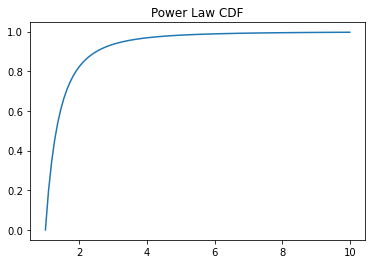

In [93]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

### Task 8. Power law PPF (0.5 point)

Let $X \sim \text{Power law}$. Next, define a random variable $R$, s.t. $R = F(X)$, so $R$ will be uniformly distributed on interval [0, 1] ([proof](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof)). Good thing here is that we easily can generate uniformly distributed pseudorandom numbers and then transform them into Power Law. Let us find an expression for $x = F^{-1}(r)$, where $r$ is an observation from uniform distrubution on interval [0, 1]. 

Find an analytical form of $F^{-1}(r)$ and write a function `power_law_ppf` (percent point function, also known as a quantile) with parameters `r`, `alpha` and `x_min`. 

In [94]:
def power_law_ppf(r, alpha=3.5, x_min=1):
    return x_min * (1 - r) ** (1 / (1 - alpha))

In [95]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

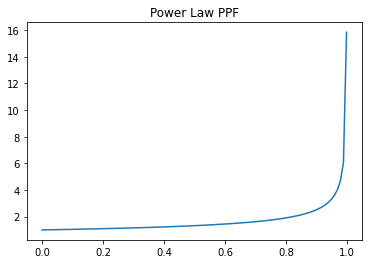

In [96]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Finally, we can generate observation from Power law distribution as follows:
1. Generate observation from uniform distribution on interval [0, 1]
2. Calculate PPF value of given observation

In [97]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Look at the histogram of the generated sample

In [98]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

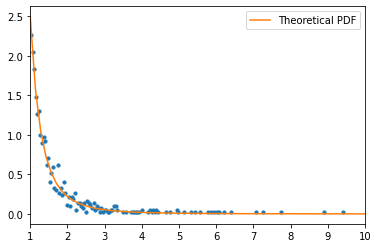

In [99]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

And here is the same histogram in log-log scale

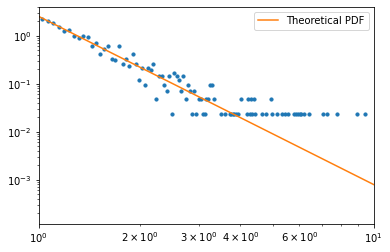

In [100]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

### Task 9. Estimation of alpha with linear binning (0.5 point)

Given observations from the Power Law distribution, try to estimate $\alpha$. The easiest way is to draw an empirical PDF with linear binning in log-log scale and apply linear regression. By _linear binning_ we mean to keep a bin width is fixed.

Write a function `alpha_lin_bins` that takes a train set, number of linear bins and returns an estimated $\alpha$.

_Hints:_
* _Take log in both side of $p(x) = Cx^{-\alpha}$_
* _To calculate an empirical PDF, use `np.histogram(x_train, bins=bins, density=True)`_
* _To calculate pseudoinverse matrix, use `np.linalg.pinv`_
* _Also you can use fit-predict in `sklearn.linear.LinearRegression`_

In [126]:
from sklearn.linear_model import LinearRegression

log_x = np.log(x_train)
pdf = np.histogram(log_x, bins=bins, density=True)
pdf[1].shape

(101,)

In [240]:
def alpha_lin_bins(x_train, bins):
#     return 1 + x_train.shape[0] * (
#         sum([np.log(x_train[i] / x_train.min()) for i  in range(x_train.shape[0])]) ** -1)
    y, x = np.histogram(x_train, bins=bins, density=True)
    x_new = (x[1:] + x[:-1]) / 2
    x_new = x_new[y != 0]
    y = y[y != 0]
    lr = LinearRegression()
    lr.fit(np.log(x_new).reshape(x_new.shape[0], 1), np.log(y))
    return -lr.coef_[0]

In [246]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

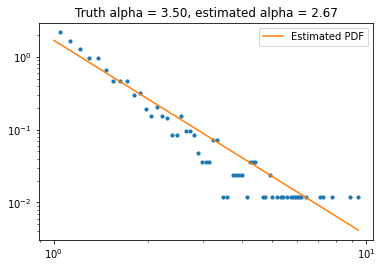

In [247]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()

### Task 10. Degree distribution (1 point)

In this task we will generate different types of graph from its degree distributions.

__Graph A__ should be described with the density `[0, 2, 10]`.

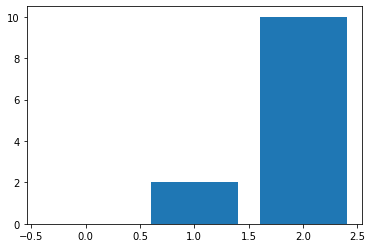

In [306]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [308]:
import functools, operator
def generate_graph_a() -> nx.Graph:
#     sequence = [0, 2, 10]
#     seq = [[i for t in range (sequence[i])]for i in range(len(sequence))]
#     seq = functools.reduce(operator.concat, seq)
#     G = nx.havel_hakimi_graph(seq)
#     G = nx.disjoint_union(nx.cycle_graph(10), nx.cycle_graph(2))
    
    return nx.path_graph(12)

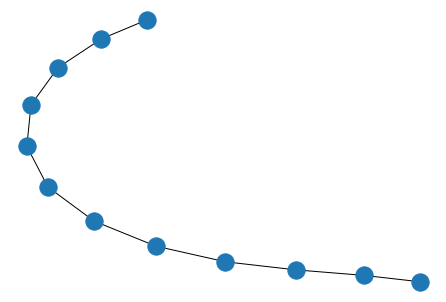

In [309]:
assert nx.degree_histogram(generate_graph_a()) == dens_a
nx.draw(generate_graph_a())

__Graph B__

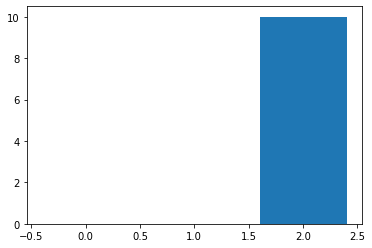

In [286]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [287]:
def generate_graph_b() -> nx.Graph:
    return nx.cycle_graph(10)

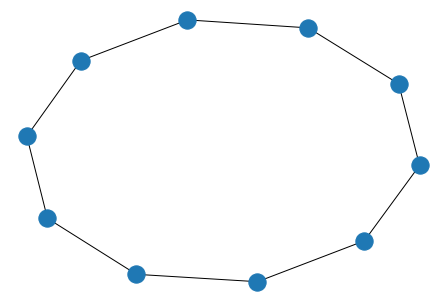

In [288]:
assert nx.degree_histogram(generate_graph_b()) == dens_b
nx.draw(generate_graph_b())

__Graph C__

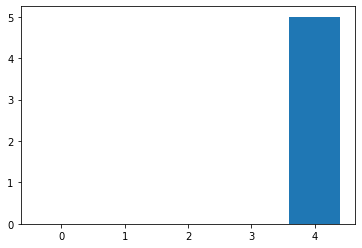

In [291]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [292]:
def generate_graph_c() -> nx.Graph:
    return nx.complete_graph(5)

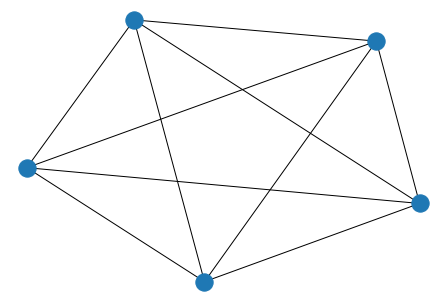

In [293]:
assert nx.degree_histogram(generate_graph_c()) == dens_c
nx.draw(generate_graph_c())

__Graph D__

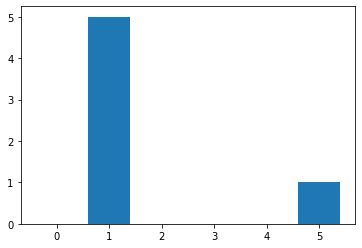

In [294]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [300]:
def generate_graph_d() -> nx.Graph:
    return nx.star_graph(5)

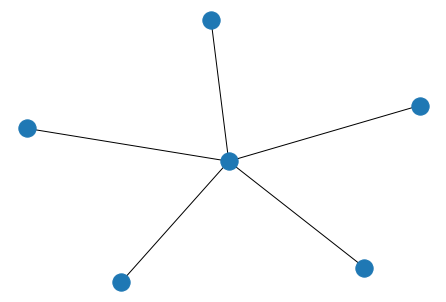

In [303]:
assert nx.degree_histogram(generate_graph_d()) == dens_d
nx.draw(generate_graph_d())

### Task 11. MLE of alpha in Power Law (2 points)

Let us estimate $\alpha$ and $x_\min$ of a real social network using maximum likelihood. Here is a real degree distribution of the network of emails between members of the research institution with 1005 nodes.m

In [353]:
url = 'https://raw.githubusercontent.com/netspractice/ml-on-graphs/main/datasets/email_degree_sequence.txt'
open('email_degree_sequence.txt', 'wb').write(requests.get(url).content);


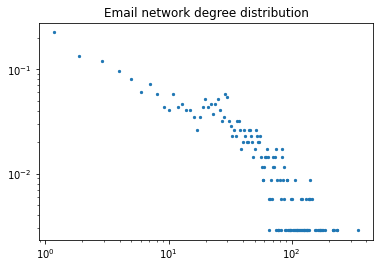

In [354]:
degree_sequence = np.loadtxt('email_degree_sequence.txt')
hist, bin_edges = np.histogram(degree_sequence, bins=1000, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('Email network degree distribution')
plt.xscale('log')
plt.yscale('log')

The MLE consists of:
1. Fix $x_\min$ as a minimal node degree (drop node degrees that less than $x_\min$)
2. Calculate $\alpha$ via maximum likelihood estimation using fixed $x_\min$
$$\alpha = 1 + n \left[\sum_i \log \frac{x_i}{x_\min} \right]^{-1}$$
3. Calculate Kolmogorov-Smirnov test
4. Fix $x_\min$ as the next node degree
5. Repeat 2-4 by scanning all possible $x_\min$ and find the best $\alpha$ and $x_\min$ with respect to Kolmogorov-Smirnov test

Write a function `ml_power_law_params` that takes a node degree sequence `degree_sequence` and returns a tuple of two values: the best $\alpha$ and $x_\min$.

_Hints:_
* _to calculate Kolmogorov-Smirnov distance use `scipy.stats.kstest` with a parameter `cdf=power_law_cdf, args=(alpha, x_min)`_
* _since we only consider graphs, check only integer x_min_

In [371]:
import scipy

def mle_power_law_params(degree_sequence):
    res = []
    for x_min in range(1, 100):
        seq = degree_sequence[degree_sequence >= x_min]
        if len(seq) == 0:
            break
        alpha = 1 + seq.shape[0] * np.power(np.log(seq / x_min).sum(), -1)
        D, p = scipy.stats.kstest(rvs = seq, cdf=power_law_cdf, args=(alpha, x_min))
        res.append((x_min, alpha, D))
    res.sort(key=lambda x: x[2])
    x_min, alpha = res[0][:2]
    return alpha, x_min

In [372]:
alpha, x_min = 3.5, 3
hat_alpha, hat_x_min = mle_power_law_params(power_law_generate(1000, alpha, x_min))
assert np.abs(hat_alpha - alpha) < 0.05
assert np.abs(hat_x_min - x_min) < 0.001

alpha, x_min = 7, 1
hat_alpha, hat_x_min = mle_power_law_params(power_law_generate(1000, alpha, x_min))
assert np.abs(hat_alpha - alpha) < 0.1
assert np.abs(hat_x_min - x_min) < 0.0001

hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
assert np.abs(hat_alpha - 2.9) < 0.1
assert np.abs(hat_x_min - 42) < 1

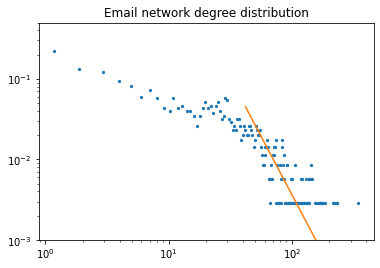

In [374]:
hist, bin_edges = np.histogram(degree_sequence, bins=1000, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('Email network degree distribution')

hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
x_space = np.linspace(hat_x_min, degree_sequence.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, hat_x_min), 
         label='Estimated PDF', c='tab:orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 0.5);